# Project (predicting if person have heart disease)

In [1]:
#importing all the tools needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split , cross_val_score , RandomizedSearchCV , GridSearchCV 
from sklearn.metrics import confusion_matrix , classification_report , precision_score , recall_score , f1_score  , RocCurveDisplay

In [2]:
#Load data
df = pd.read_csv("dataset/heart-disease.csv")
df.shape

(303, 14)

In [3]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Exploratorty Data analysis
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

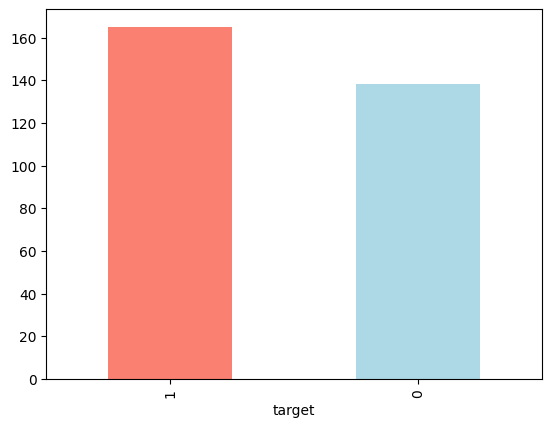

In [5]:
df["target"].value_counts().plot(kind = 'bar' , color = ['salmon', 'lightblue'])
plt.show()

In [6]:
#are there any missing values in our data?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## comparing and finding patterns

In [7]:
#comparing sex and target
# 0 - female , 1- male
pd.crosstab(df.target , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


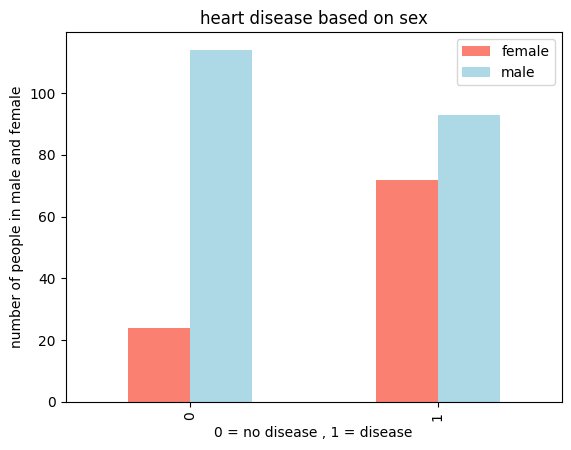

In [8]:
pd.crosstab(df.target , df.sex).plot(kind = 'bar' , color =['salmon', 'lightblue'])
plt.title('heart disease based on sex');
plt.xlabel('0 = no disease , 1 = disease');
plt.ylabel('number of people in male and female');
plt.legend(["female","male"])
plt.show();

#### by this graph we can infer that number of female getting a heart disease is more likely

In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### age vs max heart rate 

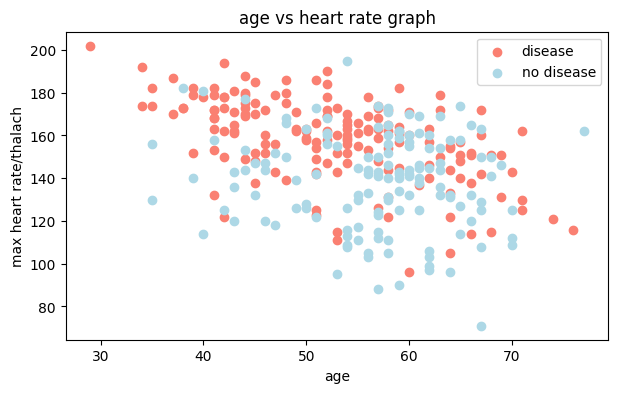

In [10]:
#creating a figure 
plt.figure(figsize = (7,4))
#creating a scatter plot for person with heart disease
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c = "salmon")
#for person without heart disease
plt.scatter(df.age[df.target==0],
           df.thalach[df.target == 0],
           c = "lightblue")


#adding info to graph
plt.title("age vs heart rate graph")
plt.xlabel("age")
plt.ylabel("max heart rate/thalach")
plt.legend(["disease","no disease"])

plt.show();

### Heart disease frequency per chest pain type




In [11]:
pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


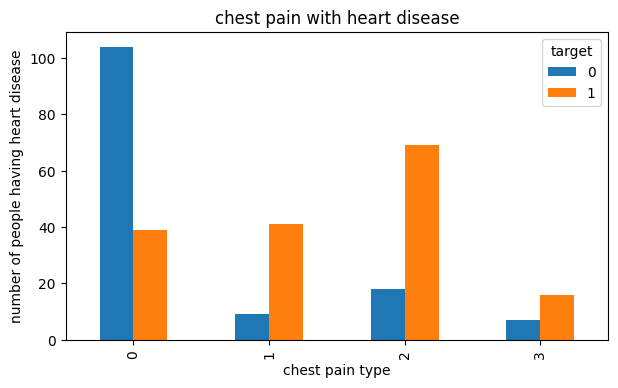

In [12]:
pd.crosstab(df.cp , df.target).plot(kind = 'bar', figsize = (7,4))
plt.title("chest pain with heart disease")
plt.xlabel("chest pain type")
plt.ylabel("number of people having heart disease")
plt.show()


this shows how many people have heart disease if they have different chest pains

In [13]:
#make correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


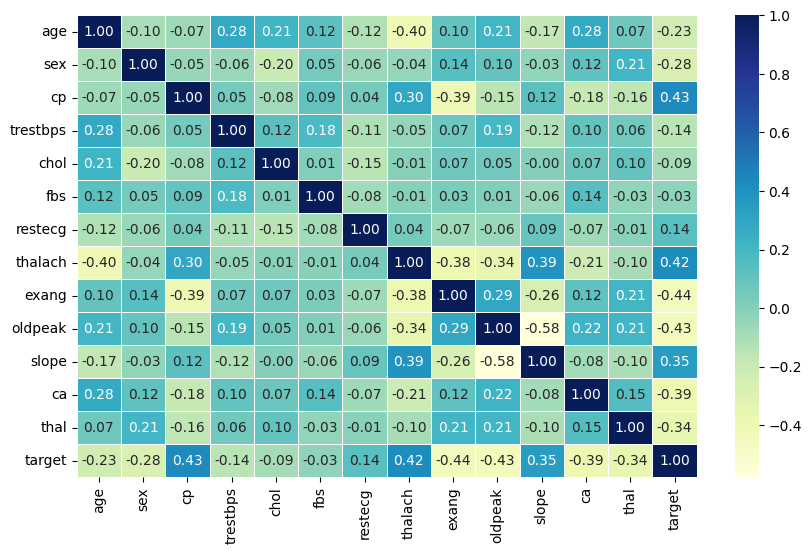

In [14]:
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize = (10,6))
ax = sns.heatmap(corr_matrix , annot = True , linewidths =0.5 , fmt = ".2f", cmap ="YlGnBu" )
plt.show();

## Modeling 

In [15]:
# split the data in features(x) and target(y)
x = df.drop("target", axis = 1)
y = df['target']

In [16]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [18]:
# spliting data into train and test sets
np.random.seed(42)
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

In [19]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [20]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

we are going to try 3 different models (logistic regression , k nearest neighbors and random forest classifier)

In [21]:
# creating a dictionary of models
models = {"LogisticRegression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "RandomForestClassifer":RandomForestClassifier()}
#creating a function to fit and score data
def fit_and_score(x_train , y_train , x_test , y_test):
    """
    x_train - training dataset of features
    y_train - training dataset of target 
    x_test - testing dataset of features
    y_test - testing dataset of target
    
    """
    #set random seed 
    np.random.seed(42)
    #make an empty dictionary to keep model scores
    model_scores = {}
    #loop through models
    for name , model in models.items():
        #fit the model to data
        model.fit(x_train , y_train)
        #score the model
        model_scores[name] = model.score(x_test , y_test)

    return model_scores

In [22]:
model_scores = fit_and_score(x_train = x_train,
                             y_train = y_train,
                             x_test = x_test,
                             y_test = y_test)
model_scores

C:\Users\user\Desktop\ML_course\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifer': 0.8360655737704918}

### Model Comparison

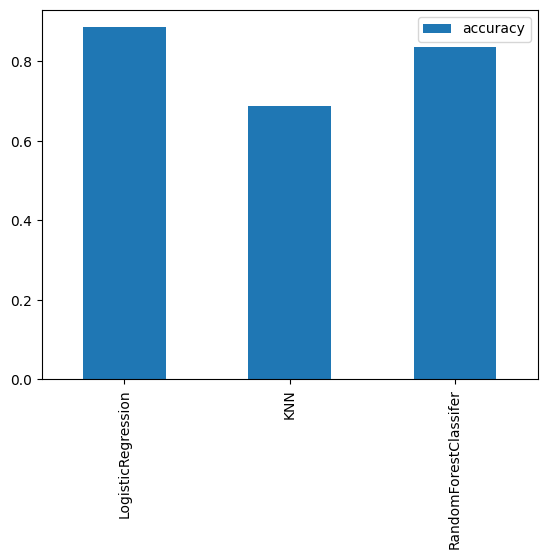

In [23]:
model_compare = pd.DataFrame(model_scores ,index = ["accuracy"])
model_compare.T.plot.bar()
plt.show();

## Hyperparameter Tuning
changing hyperparameters to improve the model

In [24]:
#tuning KNN
train_scores = []
test_scores = []
#creating a list of  n neighbors 
neighbors = range(1,21)

#setup KNN instance
knn = KNeighborsClassifier()

#looping through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)

    #fit the algorithm
    knn.fit(x_train , y_train)

    #appending to train score
    train_scores.append(knn.score(x_train,y_train))

    #appending to test score
    test_scores.append(knn.score(x_test,y_test))

In [25]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [26]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

In [27]:
max_score = round(max(test_scores)*100 , 2)
max_score

75.41

as we can see the score coming after hyperparameter tuning on knn is still less than that of logistic regression , so we drop this model

### Tuning by RandomizedSearchCV
for logistic regression and randomforest classifier

In [28]:
log_reg_grid = {"C":np.logspace(-4,4,20),
                 "solver":["liblinear"]}
#creating hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

In [29]:
np.random.seed(42)

#setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [30]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

lets do the same for RandomForestClassifier

In [31]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [32]:
rs_rf.score(x_test,y_test)

0.8688524590163934

### Tuning by using GridSearchCV
this will try every single combination in the dictionary created 


In [33]:
log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver":["liblinear"]}
#setting up grid for logisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True)
gs_log_reg.fit(x_test,y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [34]:
gs_log_reg.score(x_test,y_test)

0.9344262295081968

In [40]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

## Evaluating our model

In [35]:
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

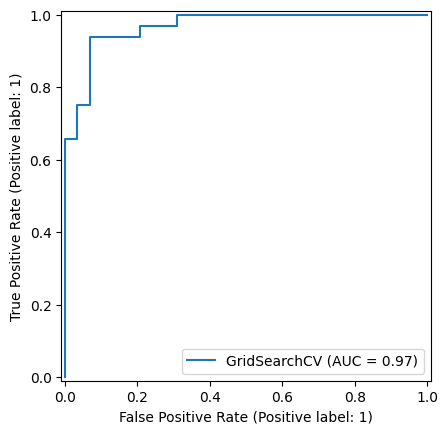

In [44]:
RocCurveDisplay.from_estimator(estimator = gs_log_reg,
                               X = x_test,
                               y = y_test)
plt.show();

In [45]:
#confusion matrix
print(confusion_matrix(y_test , y_preds))

[[27  2]
 [ 2 30]]


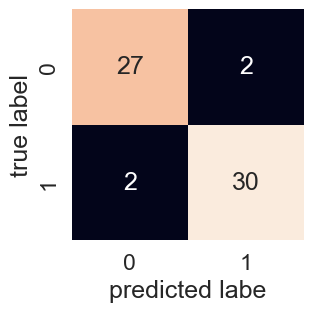

In [47]:
# to make it more visual we can use seaborn heatmap
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test ,y_preds):
    fig , ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("predicted labe")
    plt.ylabel("true label")
plot_conf_mat(y_test,y_preds) 
plt.show();
    

In [48]:
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        29
           1       0.94      0.94      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61



### Calculate classification metrics using cross validation

In [ ]:
gs_log_reg.best_params_

In [ ]:
#creating a new classifier with best parameters
clf = LogisticRegression(C = 1.3738237958832638,
                         solver = "liblinear")

In [ ]:
#cross-validated precision
cv_precision = cross_val_score(clf,
                               x,
                               y,
                               cv = 5,
                               scoring = 'precision')
cv_precision = np.mean(cv_precision)
cv_precision

In [ ]:
#cross_validated recall
#cross-validated precision
cv_recall = cross_val_score(clf,
                               x,
                               y,
                               cv = 5,
                               scoring = 'recall')
cv_recall = np.mean(cv_recall)
cv_recall

In [ ]:
#cross-validated f1 score
#cross-validated precision
cv_f1 = cross_val_score(clf,
                               x,
                               y,
                               cv = 5,
                               scoring = 'f1')
cv_f1 = np.mean(cv_f1)
cv_f1

### Feature Importance

In [37]:
clf = LogisticRegression(C = 1.3738237958832638,
                         solver = "liblinear")
clf.fit(x_train,y_train)

LogisticRegression(C=1.3738237958832638, solver='liblinear')

In [38]:
clf.coef_

array([[ 0.00633085, -1.42862484,  0.80456195, -0.01289764, -0.00249105,
         0.14858522,  0.54777976,  0.02597542, -0.93224224, -0.6177049 ,
         0.68963633, -0.7866042 , -0.8776075 ]])

In [39]:
feature_dict = dict(zip(df.columns , list(clf.coef_[0])))
feature_dict

{'age': 0.006330848725603584,
 'sex': -1.4286248435212061,
 'cp': 0.8045619541361099,
 'trestbps': -0.012897639064714604,
 'chol': -0.002491049760819902,
 'fbs': 0.14858522131602253,
 'restecg': 0.5477797568199962,
 'thalach': 0.025975419443753027,
 'exang': -0.9322422439959426,
 'oldpeak': -0.617704896940055,
 'slope': 0.6896363285659758,
 'ca': -0.7866041999771387,
 'thal': -0.8776075003459497}

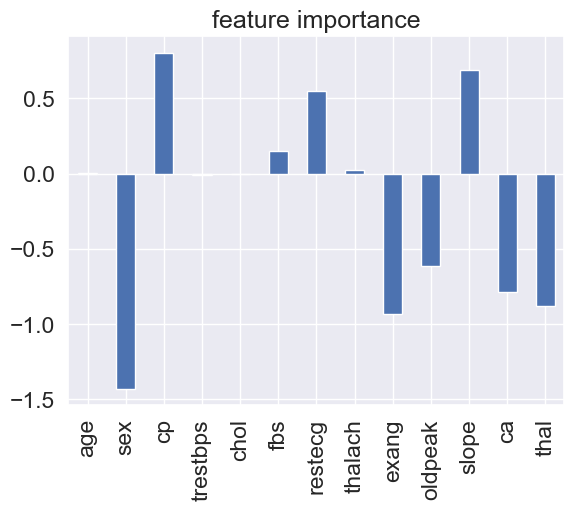

In [49]:
# visualizing feature importance
feature_df = pd.DataFrame(feature_dict,index = [0])
feature_df.T.plot.bar(title = "feature importance", legend = False)
plt.show()